In [2]:
import pandas as pd
import matplotlib.pyplot as plt; plt.rcdefaults()
import numpy as np
import matplotlib.pyplot as plt
import re

In [90]:
df = pd.read_csv("data/train3.csv")

In [20]:
    # temporary
df_temp = df

In [36]:
    # reset
df = df_temp

In [91]:
df.head()

,text,class,ID
0,Fun little place to stop and have lunch There...,positive,1307144
1,This place was PACKED Went for late night foo...,negative,5544361
2,We board the plane 30 minutes before the actua...,positive,5956200
3,Chaotic 4 story place but fun for kids The w...,positive,718388
4,After (intentionally) capsizing a sailboat in ...,neutral,174754


In [92]:
df['class'] = df['class'].replace('positive',0)
df.head()

,text,class,ID
0,Fun little place to stop and have lunch There...,0,1307144
1,This place was PACKED Went for late night foo...,negative,5544361
2,We board the plane 30 minutes before the actua...,0,5956200
3,Chaotic 4 story place but fun for kids The w...,0,718388
4,After (intentionally) capsizing a sailboat in ...,neutral,174754


In [63]:
np.random.randint(0,2)

1

In [21]:
df1 = df.head()
df2 = df.head(3)

df_all = df1.merge(df2.drop_duplicates(), on=list(df.columns.values), 
                   how='left', indicator=True)
df_all = df_all[df_all['_merge'] == 'left_only']
new_df = df_all.drop(['_merge'], axis=1)
new_df

,text,class,ID
3,Chaotic 4 story place but fun for kids The w...,positive,718388
4,After (intentionally) capsizing a sailboat in ...,neutral,174754


In [4]:
sw = pd.read_csv("stopwords.csv")

In [5]:
sw.head()

,stopwords
0,a
1,about
2,above
3,across
4,after


In [7]:
len(df)

56000

In [12]:
stop_list = set()
for stopword in sw['stopwords']:
    stop_list.add(stopword)
stop_list = list(stop_list)
stop_list.sort()

In [13]:
stop_list[0]

'a'

In [26]:
def remove_stopwords(tokens):
    new_tokens = []
    for i in range(len(tokens)):
        if tokens[i].lower() not in stop_list:
            new_tokens.append(tokens[i].lower())
    return new_tokens

def preprocess(sentence):
    tokens = sentence.split()
    new_tokens = remove_stopwords(tokens)
    return new_tokens

In [19]:
example = 'I want to cook and eat'
preprocess(example.lower())

['want', 'cook', 'eat']

In [38]:
for i in range(len(df)):
    df['text'][i] = preprocess(df['text'][i])

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [39]:
df['text'][0]

['fun',
 'little',
 'place',
 'stop',
 'lunch',
 'plenty',
 'parking',
 'tables',
 'patio',
 'inside',
 'lunch',
 'menu',
 'basics',
 'chose',
 'turkey',
 'sandwich',
 'moist',
 'tasty',
 'ordered',
 'strawberry',
 'banana',
 'smoothie',
 'hit',
 'spot',
 'hot',
 'day',
 'dog',
 'friendly',
 'place',
 'tie',
 'outs']

In [40]:
df.head()

,text,class,ID
0,"[fun, little, place, stop, lunch, plenty, park...",positive,1307144
1,"[place, packed, went, late, night, food, serve...",negative,5544361
2,"[board, plane, 30, minutes, actual, flight, ma...",positive,5956200
3,"[chaotic, 4, story, place, fun, kids, white, c...",positive,718388
4,"[(intentionally), capsizing, sailboat, ttl, sp...",neutral,174754


In [122]:
def unique_count(texts):
    counts = dict()
    for reviews in texts:
        for token in reviews:
            if token in counts:
                counts[token] = counts[token] + 1
            else:
                counts[token] = 1
    return counts

In [85]:
token_counts = unique_count(df['text'])
token_counts = sorted(token_counts.items(), key = lambda tc:(tc[1], tc[0]))
unique_count = len(token_counts)

In [89]:
top_tokens = []
top_counts = []
print("Least-frequent 10:")
for i in range(10):
    print(token_counts[i])
print("Most-frequent 10:")
for j in range(unique_count-10,unique_count):
    print(token_counts[j])
    top_tokens.append(token_counts[j][0])
    top_counts.append(token_counts[j][1])

Least-frequent 10:
('!!!!!!!!', 1)
('!!!!!!!!!!!!!!!!', 1)
('!!!!!!!!!!!!!!!!!!!!!!!!someone', 1)
('!!!!!!!!!!!!they', 1)
('!!!!!!!!!!bacon!!!!!!!!', 1)
('!!!!!!!the', 1)
('!!!!!avoid', 1)
('!!!!!close', 1)
('!!!!!she', 1)
('!!!!##couldnt', 1)
Most-frequent 10:
('best', 8254)
('really', 10249)
('just', 13012)
('like', 13071)
('time', 13645)
('service', 16745)
('good', 21619)
('great', 21813)
('place', 21993)
('food', 23038)


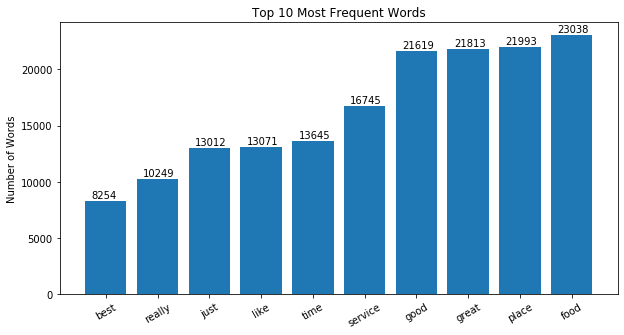

In [107]:
y_pos = np.arange(10)

plt.figure(figsize=(10,5))

plt.bar(y_pos, top_counts, align='center', alpha=1)
plt.xticks(y_pos, top_tokens, rotation=30)
plt.ylabel('Number of Words')
plt.title('Top 10 Most Frequent Words')

for i in range(10):
    plt.text(x = i-0.275 , y = top_counts[i]+250, s = top_counts[i], size = 10)

plt.show()

In [70]:
token_counts = {"K1":5, "K2":3, "K3":9, "K4":7}
token_counts = sorted(token_counts.items(), key = lambda tc:(tc[1], tc[0]), reverse=True)
token_counts

[('K3', 9), ('K4', 7), ('K1', 5), ('K2', 3)]

In [51]:
print(next(iter(token_counts)))
print(next(iter(token_counts)))

('K3', 9)
('K3', 9)


In [76]:
token_counts[1][0]

'K4'

In [54]:
len(token_counts)

4

In [63]:
for k in range(2,4):
    print(k)

2
3


In [80]:
token_counts

[('K3', 9), ('K4', 7), ('K1', 5), ('K2', 3)]

In [82]:
df.head()

,text,class,ID
0,"[fun, little, place, stop, lunch, plenty, park...",positive,1307144
1,"[place, packed, went, late, night, food, serve...",negative,5544361
2,"[board, plane, 30, minutes, actual, flight, ma...",positive,5956200
3,"[chaotic, 4, story, place, fun, kids, white, c...",positive,718388
4,"[(intentionally), capsizing, sailboat, ttl, sp...",neutral,174754


Least-frequent 20:
('!!!!!!!!', 1)
('!!!!!!!!!!!!!!!!', 1)
('!!!!!!!!!!!!!!!!!!!!!!!!someone', 1)
('!!!!!!!!!!!!they', 1)
('!!!!!!!!!!bacon!!!!!!!!', 1)
('!!!!!!!the', 1)
('!!!!!avoid', 1)
('!!!!!close', 1)
('!!!!!she', 1)
('!!!!##couldnt', 1)
('!!!!after', 1)
('!!!!food', 1)
('!!!!really?????', 1)
('!!!!they', 1)
('!!!2', 1)
('!!!a', 1)
('!!!again', 1)
('!!!awesome', 1)
('!!!good', 1)
('!!!great', 1)
Most-frequent 20:
('ordered', 6055)
('im', 6484)
('definitely', 6763)
('ive', 7000)
('dont', 7558)
('friendly', 7638)
('got', 7655)
('staff', 7740)
('love', 7975)
('nice', 7997)
('best', 8254)
('really', 10249)
('just', 13012)
('like', 13071)
('time', 13645)
('service', 16745)
('good', 21619)
('great', 21813)
('place', 21993)
('food', 23038)


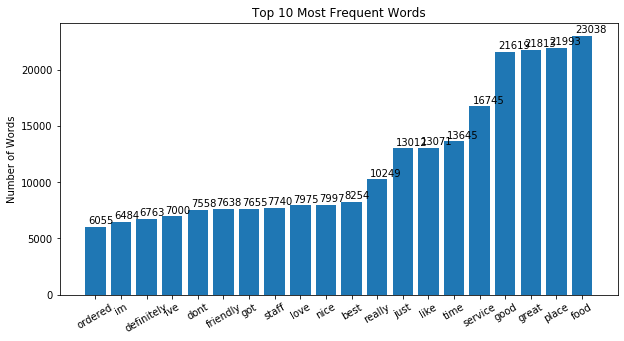

In [118]:
token_counts = unique_count(df['text'])
token_counts = sorted(token_counts.items(), key = lambda tc:(tc[1], tc[0]))
unique_count = len(token_counts)
top_tokens = []
top_counts = []
print("Least-frequent 20:")
for i in range(20):
    print(token_counts[i])
print("Most-frequent 20:")
for j in range(unique_count-20,unique_count):
    print(token_counts[j])
    top_tokens.append(token_counts[j][0])
    top_counts.append(token_counts[j][1])
y_pos = np.arange(20)

plt.figure(figsize=(10,5))

plt.bar(y_pos, top_counts, align='center', alpha=1)
plt.xticks(y_pos, top_tokens, rotation=30)
plt.ylabel('Number of Words')
plt.title('Top 10 Most Frequent Words')

for i in range(20):
    plt.text(x = i-0.275 , y = top_counts[i]+250, s = top_counts[i], size = 10)

plt.show()

In [123]:
token_counts = unique_count(df['text'])
dict_items = token_counts.items()
dict_list = list(dict_items)

nf = pd.DataFrame(dict_list)

In [126]:
nf.columns = ['token','count']
nf.head()

,token,count
0,fun,2039
1,little,5552
2,place,21993
3,stop,1509
4,lunch,3593


In [128]:
nf.to_csv("token_and_count.csv",index=False)

In [17]:
# special_chars = ['/', '$', '(', ')', '[', ']', '!', '?', ',', '']

# regex = '/$()[]!?^,\s\t\n'
regex = "[/\$()\[\]!?\^,\+\s\t\n]"
text = "H!ello/I am^the?person(do[cause)this]test$r"
new_sentence = re.split(regex, text)
new_sentence

['H', 'ello', 'I', 'am', 'the', 'person', 'do', 'cause', 'this', 'test', 'r']

In [32]:
some_list = [1,2,3,4]
another_list = [5,6]
new_list = some_list + another_list
new_list

[1, 2, 3, 4, 5, 6]

In [18]:
### Let's have a cleaner code.
### All code above this are for testing purpose only.
### ===========================================================================================================
### ===========================================================================================================

In [2]:
df = pd.read_csv("data/train3.csv")
sw = pd.read_csv("stopwords.csv")

In [3]:
df.head()

,text,class,ID
0,Fun little place to stop and have lunch There...,positive,1307144
1,This place was PACKED Went for late night foo...,negative,5544361
2,We board the plane 30 minutes before the actua...,positive,5956200
3,Chaotic 4 story place but fun for kids The w...,positive,718388
4,After (intentionally) capsizing a sailboat in ...,neutral,174754


In [4]:
sw.head()

,stopwords
0,a
1,about
2,above
3,across
4,after


In [5]:
    # adding more stops
stop_list = []
for stopword in sw['stopwords']:
	stop_list.append(stopword)
numbers = ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']

more_stop = ['']
stop_list = stop_list + numbers + more_stop

In [6]:
def remove_stopwords(tokens,stop_list):
    new_tokens = []
    for i in range(len(tokens)):
        if tokens[i].lower() not in stop_list:
            new_tokens.append(tokens[i].lower())
    return new_tokens

def preprocess(sentence):
    regex = "[/\$()\[\]!?%&*:.=\^,\+\s\t\n#]"
    tokens = re.split(regex, sentence)
    
    new_tokens = remove_stopwords(tokens,stop_list)
    return new_tokens

In [7]:
    # preprocess the df
for i in range(len(df)):
	df['text'][i] = preprocess(df['text'][i])

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [8]:
df.head() # check

,text,class,ID
0,"[fun, little, place, stop, lunch, plenty, park...",positive,1307144
1,"[place, packed, went, late, night, food, serve...",negative,5544361
2,"[board, plane, 30, minutes, actual, flight, ma...",positive,5956200
3,"[chaotic, story, place, fun, kids, white, choc...",positive,718388
4,"[intentionally, capsizing, sailboat, ttl, spen...",neutral,174754


In [10]:
    # return a dictionary: (word, count)
def unique_count(texts):
	counts = dict()
	for reviews in texts:
		for token in reviews:
			if token in counts:
				counts[token] = counts[token] + 1
			else:
				counts[token] = 1
	return counts

    # How many unique words are there?
token_counts = dict()
token_counts = unique_count(df['text']) # dictionary

    # put them in a list and sort
sorted_token_counts = sorted(token_counts.items(), key = lambda tc:(tc[1], tc[0])) # becomes a list
unique_count = len(sorted_token_counts)

In [12]:
    # get the most frequent
top_tokens = []
top_counts = []
# print("Least-frequent 10:")
# for i in range(10):
#     print(token_counts[i])
print("Most-frequent 10:")
for j in range(unique_count-10,unique_count):
	print(sorted_token_counts[j])
	top_tokens.append(sorted_token_counts[j][0])
	top_counts.append(sorted_token_counts[j][1])

Most-frequent 10:
('best', 8597)
('really', 10400)
('just', 13089)
('like', 13245)
('time', 14129)
('service', 17711)
('good', 22729)
('great', 22949)
('place', 23284)
('food', 23921)


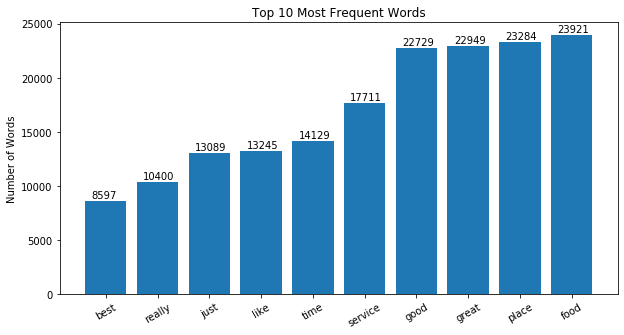

In [13]:
y_pos = np.arange(10)

plt.figure(figsize=(10,5))

plt.bar(y_pos, top_counts, align='center', alpha=1)
plt.xticks(y_pos, top_tokens, rotation=30)
plt.ylabel('Number of Words')
plt.title('Top 10 Most Frequent Words')

for i in range(10):
    plt.text(x = i-0.275 , y = top_counts[i]+250, s = top_counts[i], size = 10)

plt.show()

In [14]:
nf = pd.DataFrame(sorted_token_counts)
nf.columns = ['token','count']

nf.to_csv("preprocessed2.csv",index=False)

,token,count
0,0000,1
1,0000000,1
2,000km,1
3,000miles,1
4,000s,1


In [16]:
df.head()

,text,class,ID
0,"[fun, little, place, stop, lunch, plenty, park...",positive,1307144
1,"[place, packed, went, late, night, food, serve...",negative,5544361
2,"[board, plane, 30, minutes, actual, flight, ma...",positive,5956200
3,"[chaotic, story, place, fun, kids, white, choc...",positive,718388
4,"[intentionally, capsizing, sailboat, ttl, spen...",neutral,174754


In [20]:
put_together = df['text']
for i in range(len(put_together)):
	str = ""
	for word in put_together[i]:
		str = str + word + " "
	put_together[i] = str

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [21]:
put_together.head()

0    fun little place stop lunch plenty parking tab...
1    place packed went late night food serve late a...
2    board plane 30 minutes actual flight make sure...
3    chaotic story place fun kids white chocolate m...
4    intentionally capsizing sailboat ttl spent goo...
Name: text, dtype: object

In [24]:
put_together.to_csv("for_stemming.csv",index=False)

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: The signature of `Series.to_csv` was aligned to that of `DataFrame.to_csv`, and argument 'header' will change its default value from False to True: please pass an explicit value to suppress this warning.
  """Entry point for launching an IPython kernel.


In [2]:
# do the Porter stem

In [31]:
train_stemmed = pd.read_csv("train_stemmed.csv")

In [32]:
train_stemmed.head()

,review
0,fun littl place stop lunch plenti park tabl pa...
1,place pack went late night food serv late awes...
2,board plane 30 minut actual flight make sure l...
3,chaotic stori place fun kid white chocol m ms ...
4,intention capsiz sailboat ttl spent good 15 mi...


In [15]:
###############
# For Test Preprocessing
###############

In [16]:
df = pd.read_csv("data/test3.csv")
sw = pd.read_csv("stopwords.csv")

In [17]:
    # adding more stops
stop_list = []
for stopword in sw['stopwords']:
	stop_list.append(stopword)
numbers = ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']

more_stop = ['']
stop_list = stop_list + numbers + more_stop

In [18]:
def remove_stopwords(tokens,stop_list):
    new_tokens = []
    for i in range(len(tokens)):
        if tokens[i].lower() not in stop_list:
            new_tokens.append(tokens[i].lower())
    return new_tokens

def preprocess(sentence):
    regex = "[/\$()\[\]!?%&*:.=\^,\+\s\t\n#]"
    tokens = re.split(regex, sentence)
    
    new_tokens = remove_stopwords(tokens,stop_list)
    return new_tokens

In [19]:
    # preprocess the df
for i in range(len(df)):
	df['text'][i] = preprocess(df['text'][i])

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [20]:
    # return a dictionary: (word, count)
def unique_count(texts):
	counts = dict()
	for reviews in texts:
		for token in reviews:
			if token in counts:
				counts[token] = counts[token] + 1
			else:
				counts[token] = 1
	return counts

    # How many unique words are there?
token_counts = dict()
token_counts = unique_count(df['text']) # dictionary

    # put them in a list and sort
sorted_token_counts = sorted(token_counts.items(), key = lambda tc:(tc[1], tc[0])) # becomes a list
unique_count = len(sorted_token_counts)

In [21]:
    # get the most frequent
top_tokens = []
top_counts = []
# print("Least-frequent 10:")
# for i in range(10):
#     print(token_counts[i])
print("Most-frequent 10:")
for j in range(unique_count-10,unique_count):
	print(sorted_token_counts[j])
	top_tokens.append(sorted_token_counts[j][0])
	top_counts.append(sorted_token_counts[j][1])

Most-frequent 10:
('best', 2129)
('really', 2508)
('like', 3241)
('just', 3253)
('time', 3530)
('service', 4412)
('good', 5694)
('great', 5849)
('place', 5959)
('food', 6162)


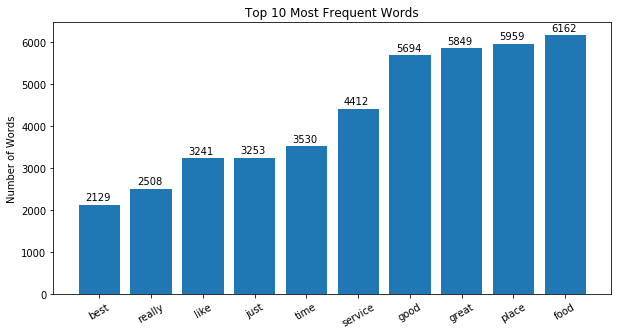

In [23]:
y_pos = np.arange(10)

plt.figure(figsize=(10,5))

plt.bar(y_pos, top_counts, align='center', alpha=1)
plt.xticks(y_pos, top_tokens, rotation=30)
plt.ylabel('Number of Words')
plt.title('Top 10 Most Frequent Words')

for i in range(10):
    plt.text(x = i-0.275 , y = top_counts[i]+100, s = top_counts[i], size = 10)

plt.show()

In [24]:
nf = pd.DataFrame(sorted_token_counts)
nf.columns = ['token','count']
nf.to_csv("preprocessed3.csv",index=False)

In [26]:
put_together = df['text']
for i in range(len(put_together)):
	str = ""
	for word in put_together[i]:
		str = str + word + " "
	put_together[i] = str

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [27]:
put_together.to_csv("for_stemming_test.csv",index=False)

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: The signature of `Series.to_csv` was aligned to that of `DataFrame.to_csv`, and argument 'header' will change its default value from False to True: please pass an explicit value to suppress this warning.
  """Entry point for launching an IPython kernel.


In [1]:
# porter stem

In [29]:
test_stemmed = pd.read_csv("test_stemmed.csv")

In [33]:
#############
# combine

In [34]:
train_preprocessed = pd.read_csv("train_preprocessed.csv")
test_preprocessed = pd.read_csv("test_preprocessed.csv")

In [36]:
combined_preprocessed = train_preprocessed.append(test_preprocessed)

In [37]:
combined_preprocessed.to_csv("combined_preprocessed.csv",index=False)

In [2]:
#####################################
# Did String2WordVector in Weka
# Split into train, validation and test sets
#####################################

In [96]:
s2wv = pd.read_csv("combined_preprocessed_s2wv_2.csv")

In [97]:
training_dataset = s2wv.head(56000)
testing_dataset = s2wv.tail(14000)

In [98]:
df = pd.read_csv("data/train3.csv")
training_dataset = pd.concat([training_dataset, df['class']], axis=1)
testing_dataset['class'] = np.random.randint(0,3,size=(len(testing_dataset),1))

testing_dataset['class'] = testing_dataset['class'].replace(0, 'negative')
testing_dataset['class'] = testing_dataset['class'].replace(1, 'neutral')
testing_dataset['class'] = testing_dataset['class'].replace(2, 'positive')

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = 

In [99]:
validation_dataset = training_dataset.sample(frac=0.25)
training_dataset = training_dataset.drop(validation_dataset.index)

In [68]:
training_dataset.shape

(42000, 497)

In [69]:
validation_dataset.shape

(14000, 497)

In [70]:
testing_dataset.shape

(14000, 497)

In [103]:
validation_dataset.head()

,abl,absolut,accommod,actual,ad,add,ago,amaz,answer,appet,...,worth,wouldnt,wow,wrong,ye,year,yelp,your,yummi,class
54724,0.0,0.0,0.0,3.578197,0.0,0.0,0.0,0.0,0.0,0.0,...,3.090211,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,positive
10771,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,positive
49623,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,positive
29110,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,negative
36818,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,positive


In [105]:
training_dataset.to_csv("for_model_training.csv",index=False)
validation_dataset.to_csv("for_model_validation.csv",index=False)
testing_dataset.to_csv("for_model_testing.csv",index=False)

In [2]:
#=======

In [3]:
trainset = pd.read_csv("for_model_training.csv")
testset = pd.read_csv("for_model_testing.csv")

In [5]:
train_col = list(trainset.columns)
test_col = list(testset.columns)

In [6]:
set(train_col) - set(test_col)

set()

In [7]:
set(test_col) - set(train_col)

set()

In [9]:
output_file = open("attribute_list.txt", "w")
for attribute in train_col:
	output = "@attribute " + attribute + " numeric\n"
	output_file.write(output)
output_file.close()

In [10]:
#=========

In [15]:
id_tests = pd.read_csv("data/test3.csv")

In [17]:
id_tests = id_tests.drop(['text'], axis=1)

In [18]:
id_tests.head()

,ID
0,178
1,344
2,2324
3,3217
4,3705


In [19]:
predictions = pd.read_csv("prediction.csv")

In [20]:
predictions.head()

,CLASS
0,positive
1,negative
2,negative
3,positive
4,positive


In [21]:
id_predictions = pd.concat([id_tests,predictions],axis=1)

In [22]:
id_predictions.head()

,ID,CLASS
0,178,positive
1,344,negative
2,2324,negative
3,3217,positive
4,3705,positive


In [23]:
id_predictions.to_csv("prediction.csv",index=False)